In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# DATADIR = "/home/tejasreddyk/Documents/YE358311_Fender_apron"
DATADIR = os.getcwd()
CATEGORIES = ["YE358311_defects/YE358311_Crack_and_Wrinkle_defect","YE358311_Healthy"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        print(img_array.shape)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
        
    break
        


(3120, 4160)


<Figure size 640x480 with 1 Axes>

In [2]:
IMG_SIZE = 500

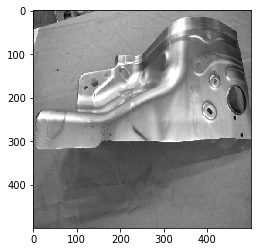

In [3]:
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [4]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)    # defects or healthy

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
        
create_training_data()
        

In [5]:
print(len(training_data))

250


In [6]:
import random
random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])
    

1
0
1
0
1
1
1
0
1
1


In [8]:
X = []
y = []

In [9]:
for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   # change 1 to 3 for non-grayscale

In [10]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()




In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))


In [12]:
X = X/255.0
X.shape

(250, 500, 500, 1)

In [16]:
model = Sequential()

model.add( Conv2D(32, (3,3), input_shape = X.shape[1:]) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(32, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(32, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(32, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(32, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(64, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics = ["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 498, 498, 32)      320       
_________________________________________________________________
activation_13 (Activation)   (None, 498, 498, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 247, 247, 32)      9248      
_________________________________________________________________
activation_14 (Activation)   (None, 247, 247, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 121, 121, 32)      9248      
__________

In [17]:
model.fit(X, y, batch_size=16, epochs=15, validation_split=0.8)

Train on 49 samples, validate on 201 samples
Epoch 1/15
49/49 [==============================] - 17s 349ms/sample - loss: 0.6994 - acc: 0.5714 - val_loss: 0.6926 - val_acc: 0.5473
Epoch 2/15
49/49 [==============================] - 17s 350ms/sample - loss: 0.6932 - acc: 0.5306 - val_loss: 0.6919 - val_acc: 0.5473
Epoch 3/15
49/49 [==============================] - 19s 392ms/sample - loss: 0.6965 - acc: 0.6122 - val_loss: 0.6897 - val_acc: 0.5473
Epoch 4/15
49/49 [==============================] - 19s 379ms/sample - loss: 0.6935 - acc: 0.5918 - val_loss: 0.6888 - val_acc: 0.5473
Epoch 5/15
49/49 [==============================] - 18s 374ms/sample - loss: 0.6898 - acc: 0.5714 - val_loss: 0.6890 - val_acc: 0.5473
Epoch 6/15
49/49 [==============================] - 18s 364ms/sample - loss: 0.6922 - acc: 0.5714 - val_loss: 0.6910 - val_acc: 0.5473
Epoch 7/15
49/49 [==============================] - 19s 384ms/sample - loss: 0.6832 - acc: 0.6327 - val_loss: 0.6917 - val_acc: 0.5473
Epoch 8/15